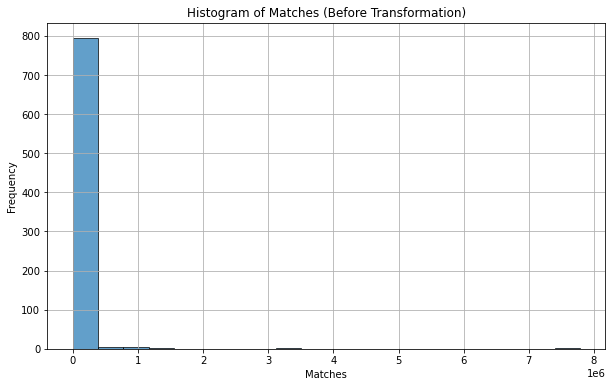

Summary Statistics:
            Matches
count  8.070000e+02
mean   3.570835e+04
std    3.160494e+05
min    0.000000e+00
25%    1.125000e+02
50%    5.960000e+02
75%    3.986500e+03
max    7.784622e+06


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data
csv_file = '../../data/raw/summary_statistics.csv'
data = pd.read_csv(csv_file)

# Summary statistics before transformation
summary_stats = data.describe()

# Histogram before transformation
plt.figure(figsize=(10, 6))
plt.hist(data['Matches'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Matches (Before Transformation)')
plt.xlabel('Matches')
plt.ylabel('Frequency')# Identify outliers using z-scores
mean_matches = np.mean(data['Matches'])
std_dev_matches = np.std(data['Matches'])
z_scores = (data['Matches'] - mean_matches) / std_dev_matches
plt.grid(True)
plt.show()

print("Summary Statistics:")
print(summary_stats)

In [31]:
z_score_cutoff = 2

# Adding a small constant to handle zero or negative values
data['Matches'] = data['Matches'] + 1

# Apply a logarithmic transformation
data['Log_Matches'] = np.log(data['Matches'])

# Calculate z-scores based on the transformed data
mean_log_matches = np.mean(data['Log_Matches'])
std_dev_log_matches = np.std(data['Log_Matches'])
z_scores = (data['Log_Matches'] - mean_log_matches) / std_dev_log_matches

cutoff_matches = np.exp(mean_log_matches + z_score_cutoff * std_dev_log_matches)
print(f"Z-Score Cutoff: {z_score_cutoff}")
print(f"Cutoff for Matches: {cutoff_matches:.2f}")


Z-Score Cutoff: 2
Cutoff for Matches: 144614.08


Outliers Removed:
    Trademark  Matches  Log_Matches
14         qq   344716    12.750476
19       bing   174799    12.071392
32         vk   320230    12.676795
97       ring   877393    13.684710
109       who   249841    12.428580
114      ally   185108    12.128695
123        hp   815321    13.611337
136       mit   718902    13.485480
159      ford   290982    12.581017
167        un  7784623    15.867661
192      line  1374282    14.133442
196     unity   177383    12.086067
211       npr   300009    12.611568
225      time   417544    12.942145
243       ted   932746    13.745888
268        1c   336588    12.726615
286       360   186935    12.138516
308       ivi   766339    13.549380
313       box   389372    12.872290
323       ups   181332    12.108085
363       sap   250428    12.430927
387        hm  1094133    13.905473
402        ey  3372036    15.031027
420        lg  1086161    13.898160
462       rei   520514    13.162572
493      ulta   199338    12.202757
591      a

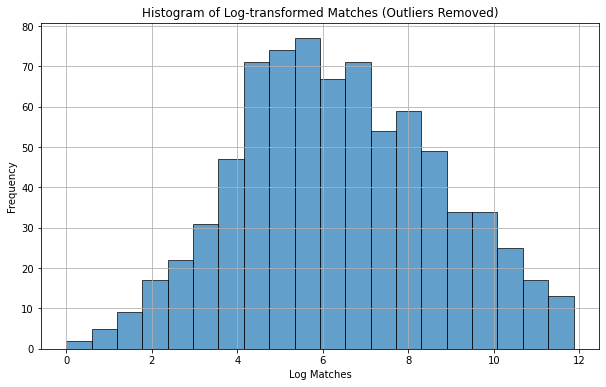

In [32]:
# Identify large outliers based on z-scores
outliers = data[z_scores > z_score_cutoff]

# Remove large outliers from the original DataFrame
data_filtered = data[z_scores <= z_score_cutoff]

# Print the list of outliers that were removed
print("Outliers Removed:")
print(outliers)
print("Number of Outliers Removed:", len(outliers))

# Histogram of the transformed data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data_filtered['Log_Matches'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Log-transformed Matches (Outliers Removed)')
plt.xlabel('Log Matches')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
# Calculate the sum of all matches
total_matches_sum = data['Matches'].sum()

# Calculate the sum of matches for outliers
outliers_matches_sum = outliers['Matches'].sum()

# Print the comparison
print(f"Sum of All Matches: {total_matches_sum}")
print(f"Sum of Matches for Outliers: {outliers_matches_sum}")

# Calculate the percentage of matches that are outliers
percentage_outliers = (outliers_matches_sum / total_matches_sum) * 100
print(f"Percentage of Matches that are Outliers: {percentage_outliers:.2f}%")

# Calculate the number of all trademarks (entries) and the number of outliers
total_trademarks = len(data)
number_of_outliers = len(outliers)

# Print the comparison
print(f"Number of All Trademarks: {total_trademarks}")
print(f"Number of Outliers: {number_of_outliers}")

# Calculate the percentage of trademarks that are outliers
percentage_trademarks_outliers = (number_of_outliers / total_trademarks) * 100
print(f"Percentage of Trademarks that are Outliers: {percentage_trademarks_outliers:.2f}%")

Sum of All Matches: 28817449
Sum of Matches for Outliers: 24078068
Percentage of Matches that are Outliers: 83.55%
Number of All Trademarks: 807
Number of Outliers: 29
Percentage of Trademarks that are Outliers: 3.59%


In [34]:
# Get the directory path of the original CSV file
import os
csv_directory = os.path.dirname(csv_file)

# Specify the name of the outliers CSV file
outliers_csv_file = os.path.join(csv_directory, 'outliers.csv')

# Save outliers (just the trademark) into a CSV file in the same folder
outliers[['Trademark']].to_csv(outliers_csv_file, index=False)